In [17]:
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import os


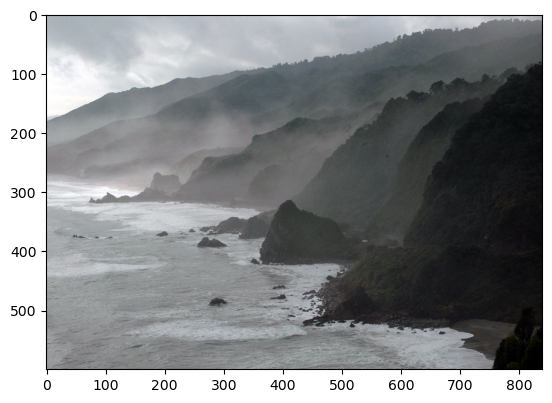

In [25]:
coast = cv2.imread('images/New_Zealand_Coast.jpg')
coast = cv2.cvtColor(coast, cv2.COLOR_BGR2RGB)
plt.imshow(coast, cmap='gray')
plt.show()
#Image('images/New_Zealand_Coast.jpg')

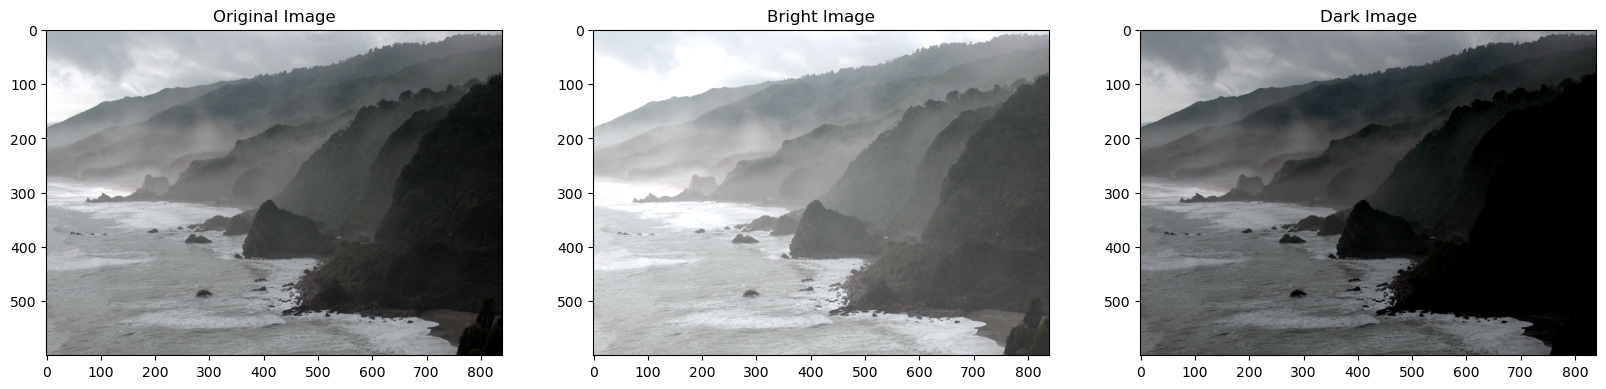

In [43]:
bm = np.ones(coast.shape, dtype='uint8') * 50
bright = cv2.add(coast, bm)
dark = cv2.subtract(coast, bm)
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(coast, cmap='gray'); plt.title('Original Image')
plt.subplot(132); plt.imshow(bright, cmap='gray'); plt.title('Bright Image')
plt.subplot(133); plt.imshow(dark, cmap='gray'); plt.title('Dark Image')
plt.show() 